In [746]:
import math
import json
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import os

with open('QTable_Alpha_0_8_Gamma_1_Decay_0_97.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 161


In [470]:
os.getcwd()
#os.chdir("C:\\Users\\benja\\OneDrive\\Documents\\Queen Mary\\Artificial Intelligence in Games\\Assignments\\MARLO\\marlo")

'C:\\Users\\benja\\OneDrive\\Documents\\Queen Mary\\Artificial Intelligence in Games\\Assignments\\MARLO\\marlo'

In [646]:
xs = []; zs = []; yaws = []
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    yaw = int(values[2])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
    
print(xs); print(zs); print(yaws)

[3, 4, 2, 1, 5, 6, 0]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 180, 90]


In [653]:
Qtable

{'3:0:0:56:0': [-0.018024960000000003, -0.043320952782848005, 0, -0.008],
 '3:0:270:55:0': [-0.0651172118462464,
  -0.0680480899043471,
  -0.05968052922089473,
  -0.059905949263462405],
 '4:0:270:55:0': [-0.05717337944883201,
  -0.06757469409168589,
  -0.06427988073844311,
  -0.06329546985570304],
 '4:0:180:55:0': [-0.05982464,
  -0.06017003625906177,
  -0.059002610614272005,
  -0.06225891267340927],
 '4:0:90:55:0': [-0.06389719735336961,
  -0.061124846498611204,
  -0.060016102604800003,
  -0.058951378146259115],
 '4:0:0:55:0': [-0.06038236960405067,
  -0.059056355660791815,
  -0.0615956262617088,
  -0.06216186628118938],
 '3:0:90:55:0': [-0.05925790722424833,
  -0.06106051066593281,
  -0.061369547325440005,
  -0.06327930825993723],
 '3:0:180:55:0': [-0.056,
  -0.05932389441732609,
  -0.05757398063513601,
  -0.06040487255080961],
 '3:1:180:55:0': [-0.06116740408279041,
  -0.05444944155770881,
  -0.05931253415411713,
  -0.054081150794501986],
 '3:2:180:55:0': [-0.054874088302182406,
  -

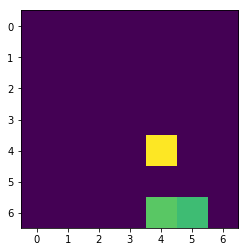

In [747]:
positiveGrid(xs,zs,Qtable)

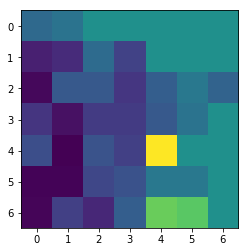

In [748]:
printGrid(xs,zs,Qtable)

In [675]:
def positiveGrid(xs,zs,Qtable):
    
    xLen = max(xs); zLen = max(zs);  
    positiveGrid = np.zeros(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])
        if reward > 0:
            gridXStart = int(x*36)
            gridXEnd = int(x*36 + 36)
            gridZStart = int(z*36)
            gridZEnd = int(z*36 + 36)
            #print("%s:%s"%(int(x),int(z)))

            positiveGrid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(positiveGrid)

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_xticklabels([str(i) for i in range(xLen+1)]);
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_yticklabels([str(i) for i in range(xLen+1)]);

In [700]:
def printGrid(xs,zs,Qtable):

    xLen = max(xs); zLen = max(zs);  
    grid = np.ones(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])
        if reward > 0:
            reward *= 0.1

        gridXStart = int(x*36)
        gridXEnd = int(x*36 + 36)
        gridZStart = int(z*36)
        gridZEnd = int(z*36 + 36)

        grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(grid)

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_xticklabels([str(i) for i in range(xLen+1)]);
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_yticklabels([str(i) for i in range(xLen+1)]);
    
    


Games:  96  - Average Time:  228.5625
Average reward for the last 5 games: 0.41 with an epsilon of 0.00
Scores that have reached over 0: 75 out of 96
Scores that have reached -2.5: 3 out of 96
Games:  173  - Average Time:  199.8612716763006
Average reward for the last 5 games: 0.27 with an epsilon of 0.00
Scores that have reached over 0: 152 out of 173
Scores that have reached -2.5: 1 out of 173


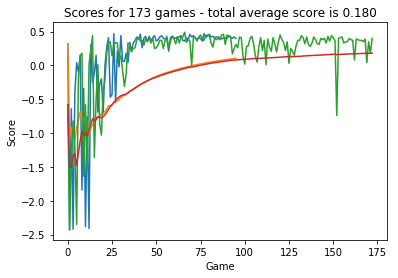

In [813]:
plotScores("Results_Alpha_0_8_Gamma_1_Decay_0_97.csv")
plotScores("QLearning_completeAction\Results_Alpha_0_8_Gamma_1_Decay_0_97.csv")

Games:  173  - Average Time:  199.8612716763006
Average reward for the last 5 games: 0.27 with an epsilon of 0.00
Scores that have reached over 0: 152 out of 173
Scores that have reached -2.5: 1 out of 173


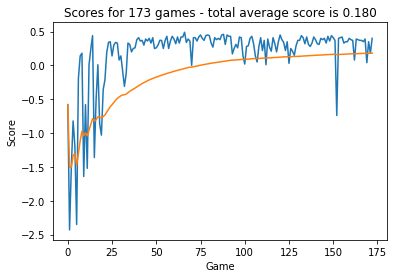

In [810]:
plotScores("QLearning_completeAction\Results_Alpha_0_8_Gamma_1_Decay_0_97.csv")

In [802]:
def plotScores(file):
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0] for x in my_data]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]

    print("Games: " , str(len(scores)), " - Average Time: ", str(sum(time)/len(scores)))
    print("Average reward for the last 5 games: %.2f with an epsilon of %.2f" % (sum(scores[-5:])/5, epsilon[-1]))
    plt.plot(scores);

    lowCount = 0
    highCount = 0
    for score in scores:
        if score < -2.4:
            lowCount += 1
        if score > 0:
            highCount += 1
    print("Scores that have reached over 0: %s out of %s"%(highCount,len(scores)))
    print("Scores that have reached -2.5: %s out of %s"%(lowCount,len(scores)))
    
    averageScores = []
    for i,score in enumerate(scores):
        averageScores.append((sum(scores[:(i+1)])/(i+1)))

    plt.plot(averageScores);
    plt.title("Scores for %s games - total average score is %.3f"%(len(averageScores),averageScores[-1]));
    plt.xlabel("Game");
    plt.ylabel("Score");

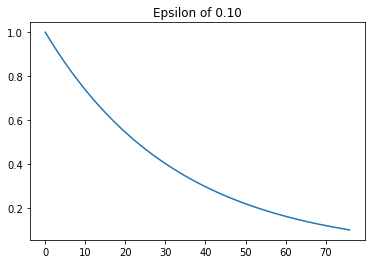

In [768]:
plt.plot(epsilon);
plt.title("Epsilon of %0.2f"%(epsilon[-1]));